In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

In [3]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

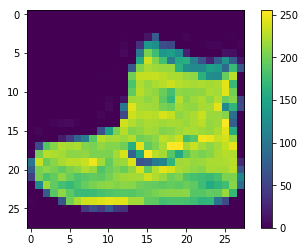

In [7]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

In [8]:
train_images = train_images / 255.0
test_images = test_images / 255.0

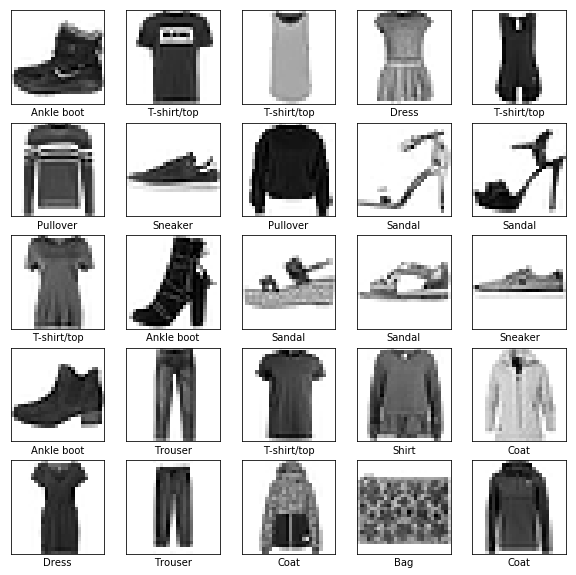

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [10]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [11]:
model.compile(optimizer=tf.train.AdadeltaOptimizer(),
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

In [12]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 3s 56us/step - loss: 2.3971 - acc: 0.0528
Epoch 2/10
60000/60000 [==============================] - 3s 51us/step - loss: 2.2216 - acc: 0.1577
Epoch 3/10
60000/60000 [==============================] - 3s 51us/step - loss: 2.0877 - acc: 0.2732
Epoch 4/10
60000/60000 [==============================] - 3s 51us/step - loss: 1.9791 - acc: 0.3725
Epoch 5/10
60000/60000 [==============================] - 3s 53us/step - loss: 1.8858 - acc: 0.4575
Epoch 6/10
60000/60000 [==============================] - 3s 52us/step - loss: 1.8024 - acc: 0.5223
Epoch 7/10
60000/60000 [==============================] - 3s 53us/step - loss: 1.7270 - acc: 0.5633
Epoch 8/10
60000/60000 [==============================] - 3s 52us/step - loss: 1.6578 - acc: 0.5943
Epoch 9/10
60000/60000 [==============================] - 3s 51us/step - loss: 1.5943 - acc: 0.6150
Epoch 10/10
60000/60000 [==============================] - 3s 51us/step - loss: 1.5359 - acc: 0.6298

In [13]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print("Test accuary: ", test_acc)

10000/10000 [==============================] - 0s 35us/step
Test accuary:  0.6264


In [14]:
predictions = model.predict(test_images)

In [15]:
predictions[0]

array([0.03450232, 0.04068005, 0.05836057, 0.02455536, 0.03833677,
       0.13055405, 0.05996108, 0.23212886, 0.10681061, 0.27411032],
      dtype=float32)

In [16]:
np.argmax(predictions[0])

9

In [17]:
test_labels[0]

9

In [18]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = "blue"
    else:
        color = "red"
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)
 
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

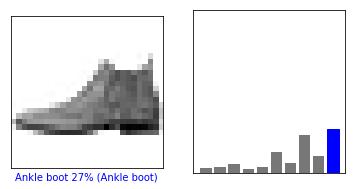

In [19]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

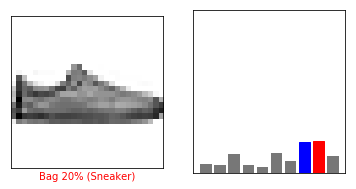

In [20]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

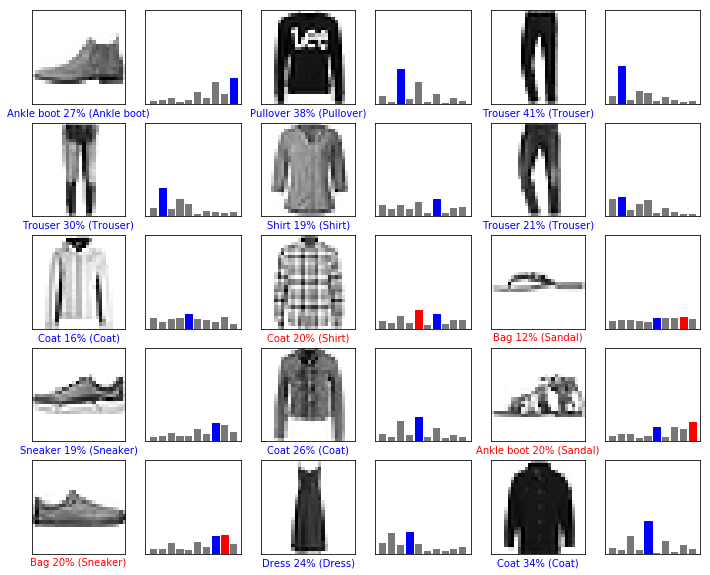

In [21]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)

In [22]:
img = test_images[0]

print(img.shape)

(28, 28)


In [23]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [24]:
predictions_single = model.predict(img)

print(predictions_single)

[[0.03450233 0.04068005 0.05836058 0.02455536 0.03833677 0.13055404
  0.05996109 0.23212881 0.10681064 0.27411032]]


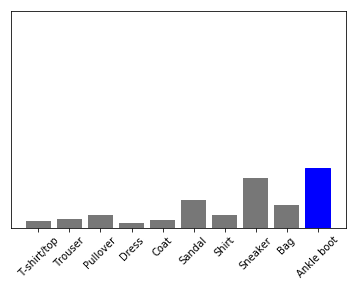

In [25]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)